# Personal Information
Name: **Xiangyu Du**

StudentID: **14398990**

Email: [**xiangyu.du@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **19.03.2023**

# Data Context
The data that will be used for this project is the historical comics collected by Kees Ribbens, who is a historian working at the NIOD, a Dutch institute for the study of the First and Second World Wars, the Holocaust and contemporary genocides. The data mainly depicts stories that happened during the Second World War with a size of 9.24 GB. 

# Data Description & Analysis

In [1]:
import cv2
import numpy as np
import random
import glob
import os
from matplotlib import pyplot as plt
import shutil
from PIL import Image, ImageFilter, ImageEnhance

Use **OpenCV** to read a sample image (and sharpen it)

In [7]:
# img = cv2.imread("D:/UvA MSDS/Thesis Project/dataset/Historical comics/dataset/#4125 001.png", 1)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # Apply the High Pass filter
# kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
# img_sharpened = cv2.filter2D(img, -1, kernel)
# plt.imshow(img_sharpened)
# plt.show()

In [8]:
# img.shape

Use **PIL (can deal with a large number of images)** to read a sample image (convert to grayscale and sharpen it)

In [7]:
kernel = ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 9, -1, -1, -1, -1))

with Image.open("D:/UvA MSDS/Thesis Project/dataset/Historical comics/dataset/#4125 004.png") as img:
    img = img.convert('L') # convert the image to gray scale
#     img_sharpened = img.filter(ImageFilter.SHARPEN)
    img_sharpened = img.filter(kernel)
    img_sharpened.save("D:/UvA MSDS/Thesis Project/code/detection/test_resize.png")
#     plt.imshow(img_sharpened)
#     plt.show()

In [13]:
img_sharpened.size

(750, 984)

## Analysis 1
Plot the **histogram of pixel intensity** to show the distribution of pixel intensity values in an image. In a grayscale image, the values range from 0 (pure black) to 255 (pure white), with shades of gray in between. 

In [5]:
# img = Image.open("D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/dataset/cropped89088.png")
# image_path = "D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/dataset/cropped141.png"
# filename = image_path.split("/")[-1] # cropped141.png
# destination_folder = "D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/useless_comics"
# new_path = destination_folder + "/" + filename
# img.save(new_path)
# print(img.size)
# img_arr = np.array(img)
# img_flat = img_arr.flatten()
# # print(img_flat) # 4797
# print(f"total pixels: {len(img_flat)}, number of pixels < 30: {len([pixel for pixel in img_flat if pixel < 30])}") # 3022

idx = 0
idx_track = 0
destination_folder = "D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/useless_comics/" # folder that contains useless comics
dataset_dir = 'D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/dataset/'
dataset_paths = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir)] # if filename.endswith(('.png', '.jpg', '.jpeg'))

for idx in range(len(dataset_paths)):
    img_path = dataset_dir + f"cropped{idx}.png"
    
    if not os.path.exists(img_path):
        continue
        
    img = Image.open(img_path)
    img_arr = np.array(img)
    img_flat = img_arr.flatten()
    
    if img.size[0] * img.size[1] < 2500 or len([pixel for pixel in img_flat if pixel < 30]) > (0.6 * len(img_flat)):
        idx_track += 1
        img_name = img_path.split("/")[-1]
        new_path = destination_folder + img_name
        shutil.move(img_path, new_path) # directly remove the image from original folder and move to another folder
#         img.save(new_path)
    
#     if idx % 100 == 0:
#         print(idx)

print("number of images that are thrown away: " + idx_track)

# plt.hist(img_flat, bins = 256, range = (0, 255), color = "gray")
# plt.xlabel('Pixel Intensity')
# plt.ylabel('Frequency')
# plt.title('Histogram of Pixel Intensity')
# plt.show()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

TypeError: can only concatenate str (not "int") to str

In [6]:
idx_track

3118

Most images of comics are black & white so their pixel intensities plot will have a U shape, meaning that most pixels are either black or white.

# Data Loading
#### Merge comics in sub folders and sub sub folders in a single folder

In [14]:
def merge_images(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        
    # Loop through all files in input folder and its subfolders
    for root, dirs, files in os.walk(input_folder):
        for filename in files:
            # Check if file is an image
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                input_file = os.path.join(root, filename)
                output_file = os.path.join(output_folder, filename)
                
                # Check if file with same name already exists in output folder
                if os.path.exists(output_file):
                    # If file exists, rename it with prefix
                    name, ext = os.path.splitext(filename)
                    i = 1
                    while os.path.exists(os.path.join(output_folder, f"{name}_{i}{ext}")):
                        i += 1
                    output_file = os.path.join(output_folder, f"{name}_{i}{ext}")
                
                # Copy file to output folder
                shutil.copy2(input_file, output_file)
    
    print("All images merged successfully!")

# merge all images from source folders and its subfolders to the dest folder
merge_images("D:/UvA MSDS/Thesis Project/dataset/Historical comics/commando comics/test", 
             "D:/UvA MSDS/Thesis Project/dataset/Historical comics/dataset")

All images merged successfully!


In [2]:
# Get list of all image file paths in directory
image_dir = 'D:/UvA MSDS/Thesis Project/dataset/Historical comics/dataset/'
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if 
               filename.endswith(('.png', '.jpg', '.jpeg'))]
print(len(image_paths))

24552


There are in total **24552** images of comics (**including noise**, e.g., some non-comic images and **replicated** comics)

In [4]:
image_sizes = []

# Loop through all files in the folder
for file_name in os.listdir(image_dir):
    # Open the image file using PIL
    image_path = os.path.join(image_dir, file_name)
    with Image.open(image_path) as img:
        # Get the size of the image
        width, height = img.size
        # Add the size to the dictionary
        image_sizes.append(width / height)
        print(width / height)

0.6265508684863523
0.3779527559055118
0.33875338753387535
0.9936305732484076
0.6996805111821086
0.4878048780487805
0.7050561797752809
0.4011627906976744
0.7195357833655706
1.0103448275862068
0.9405405405405406
0.9889705882352942
0.6526806526806527
1.07
1.43161094224924
0.9509433962264151
0.7523809523809524
0.38308457711442784
0.6544715447154471
0.4098360655737705
0.6511627906976745
0.3185840707964602
1.2114695340501793
1.0147058823529411
0.33575317604355714
0.47388059701492535
1.4321428571428572
0.734472049689441
0.7330508474576272
0.5654008438818565
0.8541666666666666
0.7777777777777778
0.5369774919614148
0.46827794561933533
0.9105431309904153
0.6149425287356322
0.6792452830188679
0.7740963855421686
0.7548076923076923
0.5702127659574469
0.5879888268156425
1.0025839793281655
0.4411134903640257
0.48089887640449436
0.8553615960099751
0.9392712550607287
0.5116279069767442
0.7947019867549668
0.4839572192513369
0.48717948717948717
0.896551724137931
1.1831932773109244
0.6164021164021164
0.51

0.5512465373961218
0.7768595041322314
0.6754966887417219
0.648578811369509
0.635593220338983
0.4693140794223827
0.3498542274052478
0.9768041237113402
0.3684210526315789
0.44
0.4781783681214421
0.4528301886792453
0.5680317040951123
0.5823529411764706
0.36923076923076925
0.5364238410596026
0.5496688741721855
0.3390804597701149
0.6442953020134228
0.5536723163841808
0.28421052631578947
0.8395989974937343
0.3991228070175439
0.9775561097256857
0.508130081300813
0.4702702702702703
0.5265017667844523
1.1354166666666667
0.9615384615384616
0.5138888888888888
0.9770114942528736
0.31519274376417233
0.6150234741784038
0.49097472924187724
0.4789762340036563
1.1633986928104576
0.2912621359223301
0.45806451612903226
0.39800995024875624
0.8434782608695652
1.219607843137255
0.5709969788519638
0.45454545454545453
0.5094339622641509
0.9318181818181818
0.47685185185185186
0.6432432432432432
0.38990825688073394
0.7708333333333334
0.41089108910891087
0.41379310344827586
0.8556005398110661
0.27586206896551724

0.5156985871271585
0.9653679653679653
0.646978021978022
1.0526315789473684
0.35714285714285715
0.3860182370820669
0.48300536672629696
0.9085239085239085
0.30927835051546393
0.6079545454545454
1.5648148148148149
0.3700234192037471
0.39800995024875624
0.6674157303370787
0.553875236294896
0.839041095890411
1.0454545454545454
0.42355371900826444
0.33121019108280253
0.379047619047619
1.139588100686499
1.2456140350877194
0.5287356321839081
1.0886917960088691
0.8744326777609682
0.575
0.391644908616188
0.9180327868852459
0.8759124087591241
1.1728395061728396
0.2684085510688836
0.5114155251141552
0.4473684210526316
0.32577903682719545
0.24147727272727273
1.5107913669064748
0.7433628318584071
0.523972602739726
0.41509433962264153
1.0057803468208093
0.7066895368782161
0.32142857142857145
0.4367816091954023
0.36141304347826086
0.5894886363636364
0.2910958904109589
0.6752873563218391
0.37404580152671757
0.5804066543438078
0.5867861142217246
0.5354223433242506
1.8478260869565217
0.7405582922824302
1

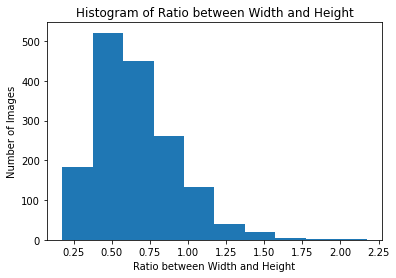

In [5]:
# Create a histogram of the data
# print(len(image_sizes))
# x = np.arange(1, 25043)
# y = np.array(image_sizes)

plt.hist(image_sizes)

# Add labels and title to the plot
plt.xlabel('Ratio between Width and Height')
plt.ylabel('Number of Images')
plt.title('Histogram of Ratio between Width and Height')

# Show the plot
plt.show()

## Analysis 2
Next, get the **mode** of each image ("P" stands for palette mode, "L" stands for grayscale model)

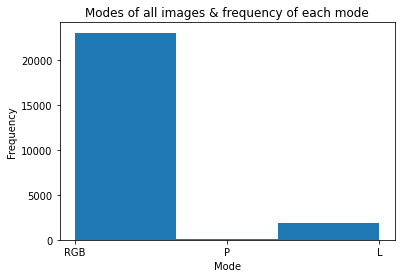

In [48]:
mode = []

for img_file in os.listdir(image_dir):
    img = Image.open(os.path.join(image_dir, img_file))
    mode.append(img.mode)
    
plt.hist(mode, bins = 3)
plt.xlabel("Mode")
plt.ylabel("Frequency")
plt.title("Modes of all images & frequency of each mode")
plt.show()

Since images are in different modes, it is necessary to align them (in our case, **convert to grayscale**).

## Analysis 3
Next, plot the **distribution of width & height** of all images in the dataset

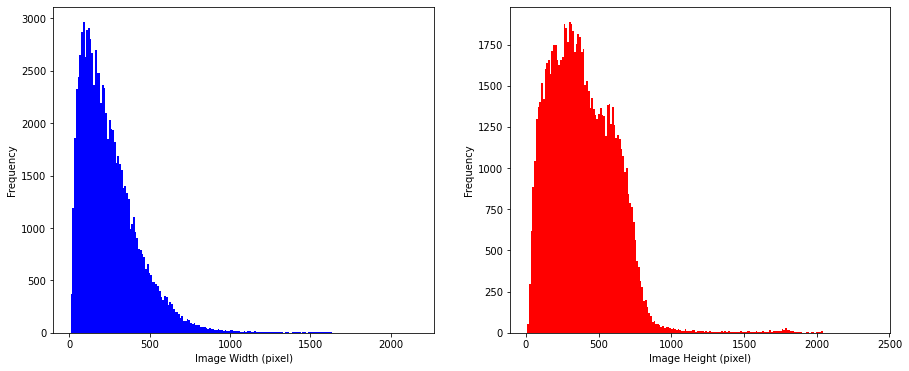

In [20]:
# image_dir = 'D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/all_characters_temp_for_EDA'

# # List to store image sizes
# widths = []
# heights = []
# multis = []

# # Loop through all files in folder
# for filename in os.listdir(image_dir):
#     # Open image and get size
#     img = Image.open(os.path.join(image_dir, filename))
#     width, height = img.size
#     # Append size to list
#     widths.append(width)
#     heights.append(height)
#     multis.append(width*height)

# Plot histogram of image sizes
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
ax[0].hist(widths, bins = 200, color = 'blue')
ax[0].set_xlabel('Image Width (pixel)')
ax[0].set_ylabel('Frequency')
# ax[0].set_title('Distribution Width')

ax[1].hist(heights, bins = 200, color = 'red')
ax[1].set_xlabel('Image Height (pixel)')
ax[1].set_ylabel('Frequency')
# ax[1].set_title('Distribution Height')
plt.show()

# plt.hist(multis, bins = 100, color = 'red')
# plt.xlabel("Image Size Distribution")
# plt.ylabel("Frequency")
# plt.title("Distribution Size")
# plt.show()

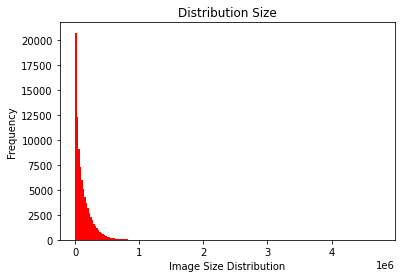

In [18]:
plt.hist(multis, bins = 200, color = 'red')
plt.xlabel("Image Size Distribution")
plt.ylabel("Frequency")
plt.title("Distribution Size")
plt.show()

It can be seen from the above plots that most images have a width of ~1600 and a height of 2000 and their sizes vary. It is therefore necessary to resize them to the same size. 

## Analysis 4
Get the smallest width & height of all images to resize

In [16]:
# Initialize variables to store minimum dimension and corresponding file path
min_width = float('inf')
min_width_path = ''
min_height = float('inf')
min_height_path = ''

# Iterate over image file paths and find image with smallest dimension
for path in image_paths:
    with Image.open(path) as img:
#         size = os.path.getsize(path)
        width, height = img.size
#         min_dim = min(width, height)
        if width < min_width:
            min_width = width
            min_width_path = path
        if height < min_height:
            min_height = height
            min_height_path = path

print(f"Image with smallest width '{os.path.basename(min_width_path)}' has width {min_width}")
print(f"Image with smallest height '{os.path.basename(min_height_path)}' has height {min_height}")

Image with smallest width 'back4245.jpg' has width 386
Image with smallest height 'Folder.jpg' has height 256


Therefore, we choose to resize all images to size **(256, 256)**, probably in the future (128, 128)

## Preprocessing (partial)
#### Preprocess the images (resize, gray-scale & sharpen) and save to local folder

In [17]:
# Define parameters for image loading, preprocessing & saving
batch_size = 32 # read 32 images at a time
j = 1 # idx of processed images
# a = 0 # idx of batches

# Iterate over batches of image file paths
for i in range(0, len(image_paths), batch_size):
    # Load batch of image files and preprocess them
    batch_paths = image_paths[i:i + batch_size]
#     batch_images = []
    for path in batch_paths:
        with Image.open(path) as img:
            img = img.resize((256, 256))
            img = img.convert('L') # convert the image to gray scale
            img = img.filter(kernel) # sharpen the image
            img.save(f"D:/UvA MSDS/Thesis Project/dataset/Historical comics/processed_comics/processed_{j}.jpg")
            j += 1
#             img = np.asarray(img) / 255.0  # Normalize pixel values to [0, 1]
#             batch_images.append(img)
#     batch_images = np.array(batch_images)

    # print the index of the iteration to track the process
#     a += 1
#     print(f"Batch {a}, Loaded batch of {batch_size} images")

In [18]:
# make sure all images are processed
processed_image_dir = 'D:/UvA MSDS/Thesis Project/dataset/Historical comics/processed_comics/'
processed_image_paths = [os.path.join(processed_image_dir, filename) for filename in 
                         os.listdir(processed_image_dir) if filename.endswith(('.png', '.jpg', '.jpeg'))]
print(len(processed_image_paths))

24552


## Analysis 5
Randomly select a portion of comics and try to inspect the number of soldiers, and infer the total number of soldiers in the whole dataset

In [3]:
processed_dir = 'D:/UvA MSDS/Thesis Project/dataset/Historical comics/dataset/'
processed_comics_paths = [os.path.join(processed_dir, filename) for filename in os.listdir(processed_dir) if 
                          filename.endswith(('.png', '.jpg', '.jpeg'))]
# print(len(processed_comics_paths))

portion = 0.01 # randomly select 1% of the whole dataset
num_images = int(len(processed_comics_paths) * portion)
selected_images = random.sample(processed_comics_paths, num_images)

In [4]:
print(len(selected_images))

245


In [32]:
# Path to folder where the selected images will be copied
sample_comic_path = 'D:/UvA MSDS/Thesis Project/dataset/Historical comics/processed_sample_for_EDA/'

# Copy the selected images to the new folder
for image_path in selected_images:
    image_name = os.path.basename(image_path)
    new_image_path = os.path.join(sample_comic_path, image_name)
    shutil.copy(image_path, new_image_path)

A **1%** randomly selected sample gives roughly **245** pure soldiers (with round helmet and mostly with guns in hands), **221** military officers (mostly with badges) and **9** images which are irrelevant by manually check. The irrelevant images can be manually removed later on since they are grouped in local folder. The number of soldiers in one image ranges from 0 to ~6 (which are recognizable by humans). Regarding the nationality of soldiers, the sample mainly demonstrates the **Japanese and German** soldiers and officers. It requires some domain/background knowledge to recognize them accurately. 

The **alternative dataset** that is primarily decided to be used is eBDtheque which is described in the following paper:

Guérin, C., Rigaud, C., Mercier, A., et al.: eBDtheque: a representative
database of comics. In ICDAR, 2013, pp. 1145-1149.

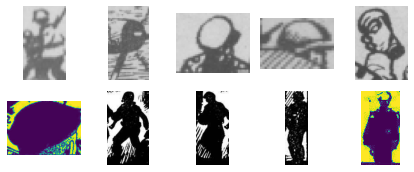

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import re

# directory of your images
dir_path = 'D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/10_anomalies'

# get list of file paths
file_paths = [os.path.join(dir_path, fname) for fname in os.listdir(dir_path) if fname.endswith('.png')]

# custom sorting function
def sort_key(file_path):
    # extract the number from the filename
    number = re.search(r'cropped(\d+).png', os.path.basename(file_path))
    if number is not None:
        return int(number.group(1))
    else:
        return 0  # or some other value

# sort file_paths using custom function
file_paths.sort(key=sort_key)

fig, axes = plt.subplots(2, 5, figsize=(6, 2.5))

for i, file_path in enumerate(file_paths):
    img = Image.open(file_path)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')  # to hide axis labels

plt.tight_layout()
plt.show()

In [7]:
import os
import shutil

# list of source directories
source_dirs = ['D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/10_anomalies', 
               'D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/dataset', 
               'D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/dataset_30600', 
               'D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/extra_set_600',
               'D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/set_another_1k4_to_form_10', 
               'D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/testset_4k5', 
               'D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/useless_comics',
               'D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/useless_comics_temp']
target_dir = 'D:/UvA_MSDS/Thesis_Project/dataset/Historical-comics/cropped_char/all_characters_temp_for_EDA'

for source_dir in source_dirs:
    for file_name in os.listdir(source_dir):
        if file_name.endswith('.png'):
            # construct full file path
            source = os.path.join(source_dir, file_name)
            target = os.path.join(target_dir, file_name)
            # copy the file
            shutil.copy(source, target)